Dataset shape: (30000, 25)

Data types:
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: obj

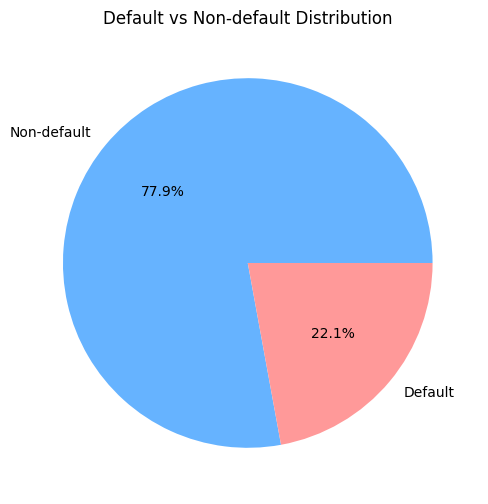

Numerical Feature Distributions:


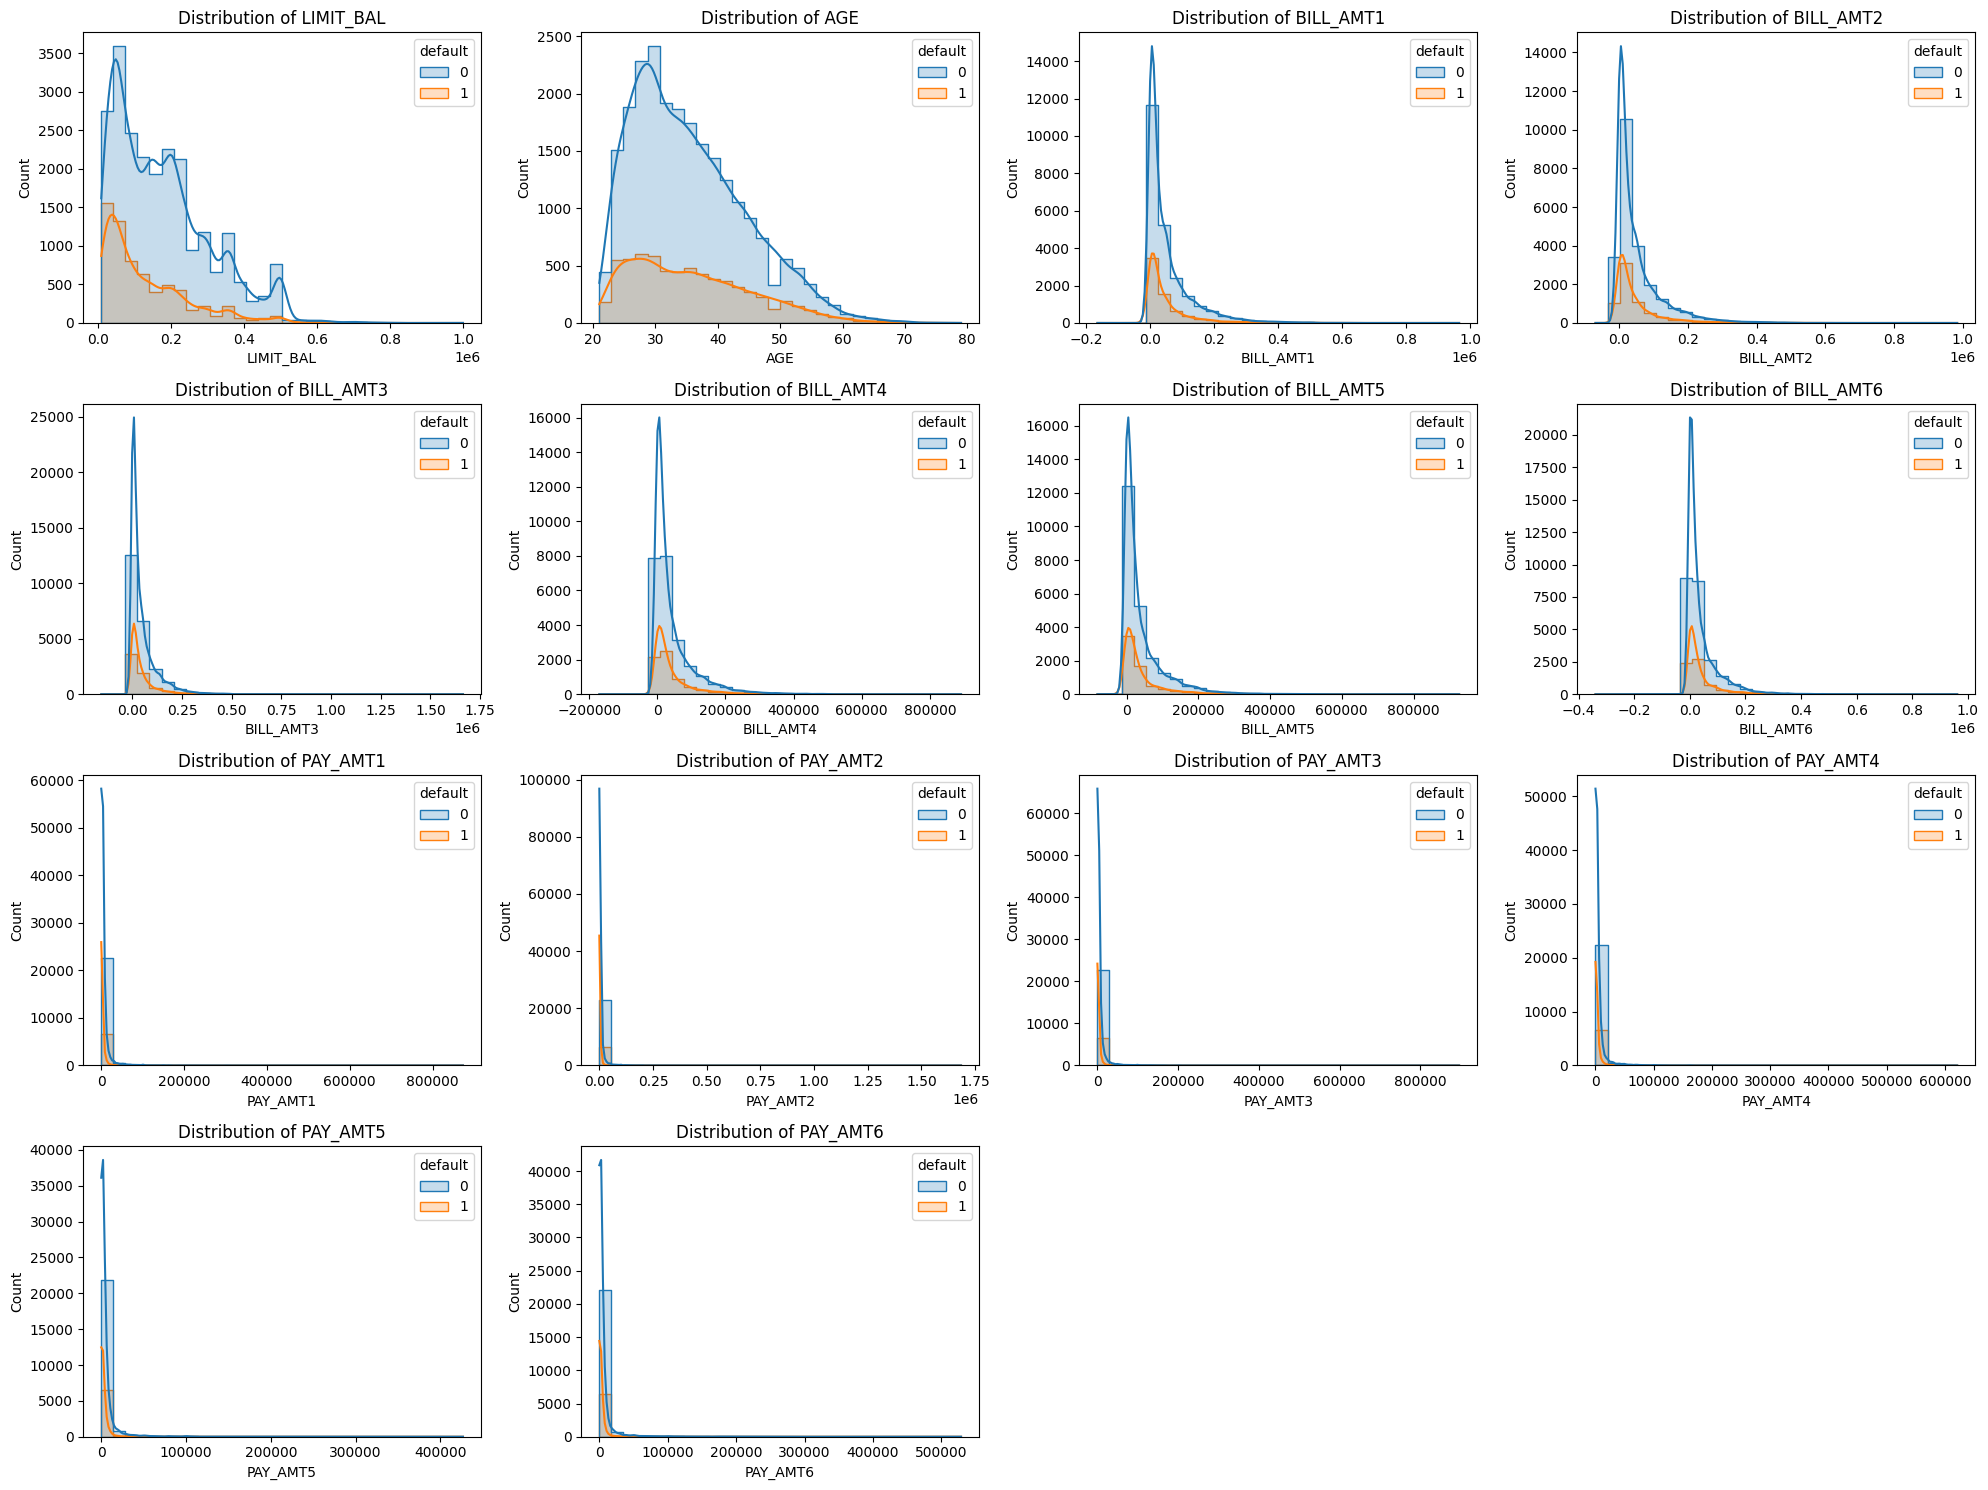

Categorical Analysis of SEX:


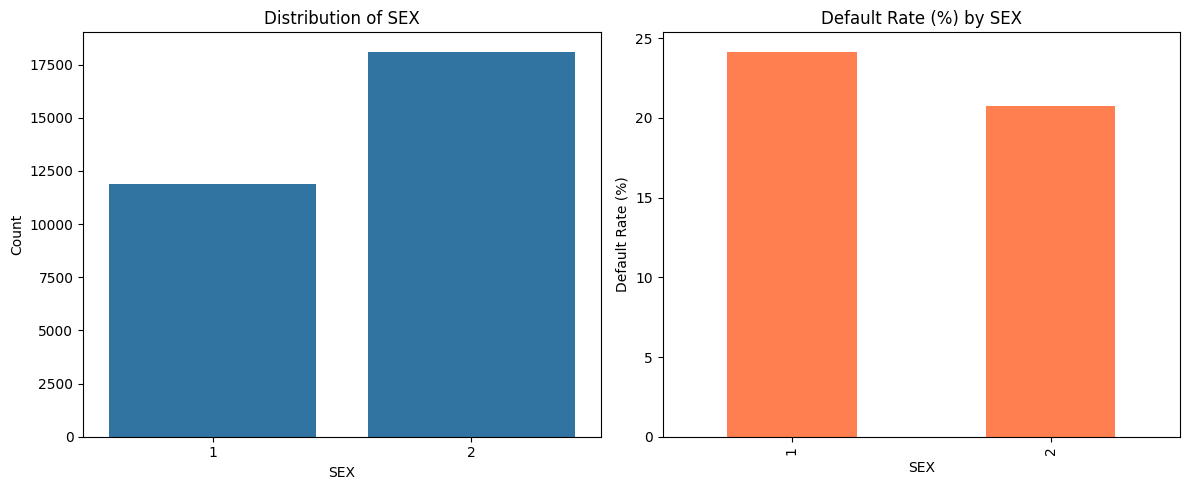

Categorical Analysis of EDUCATION:


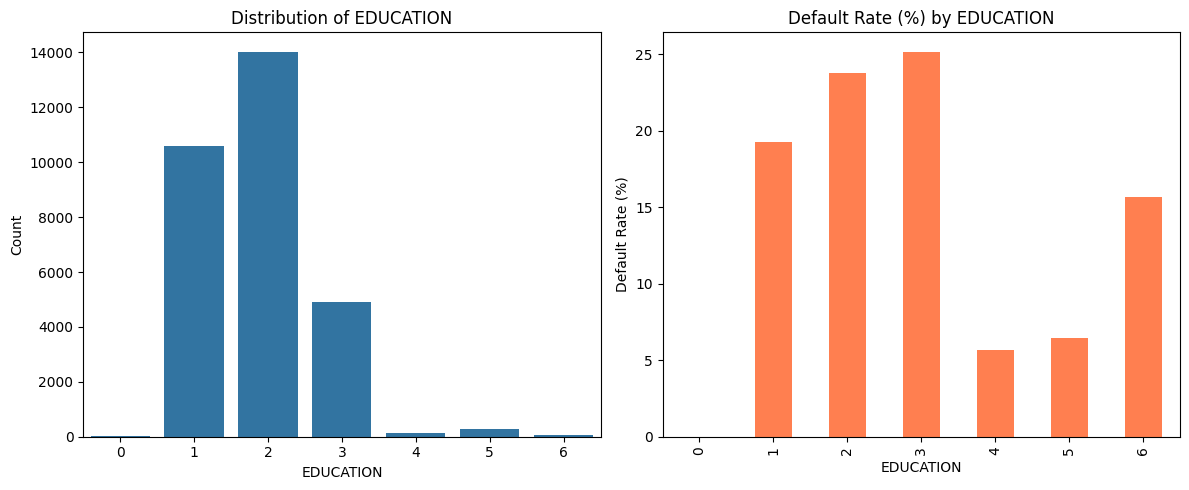

Categorical Analysis of MARRIAGE:


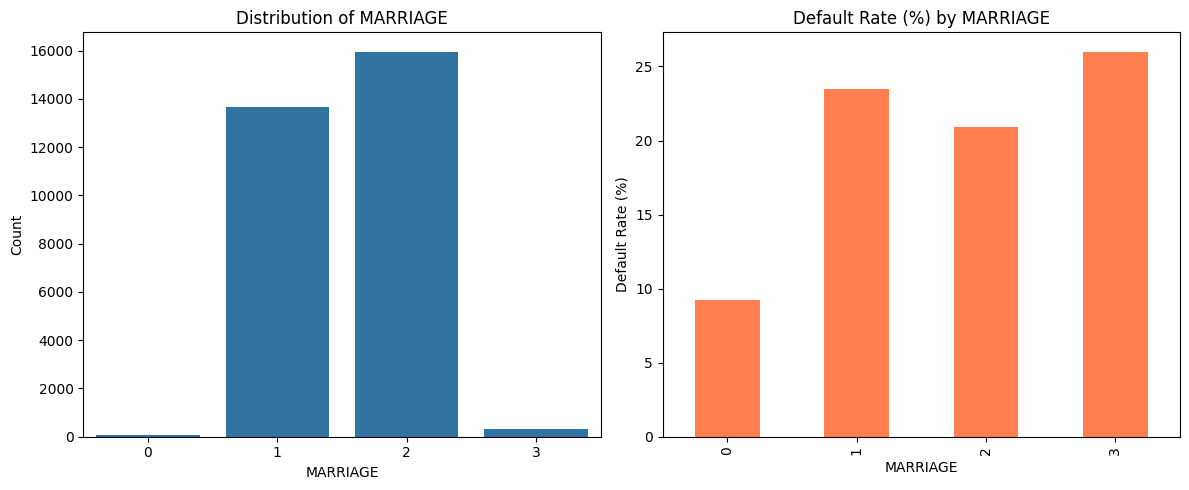

Categorical Analysis of PAY_0:


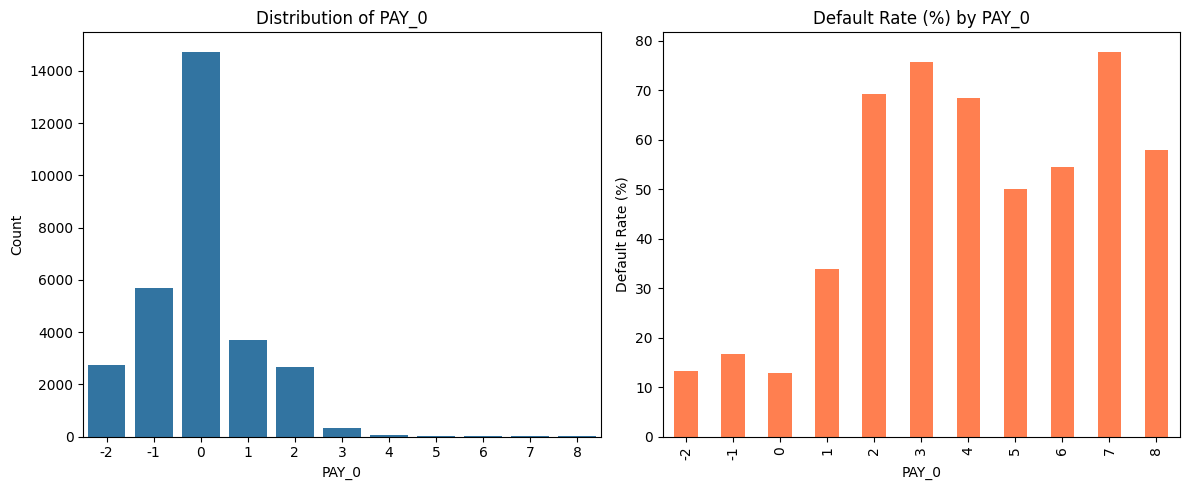

Categorical Analysis of PAY_2:


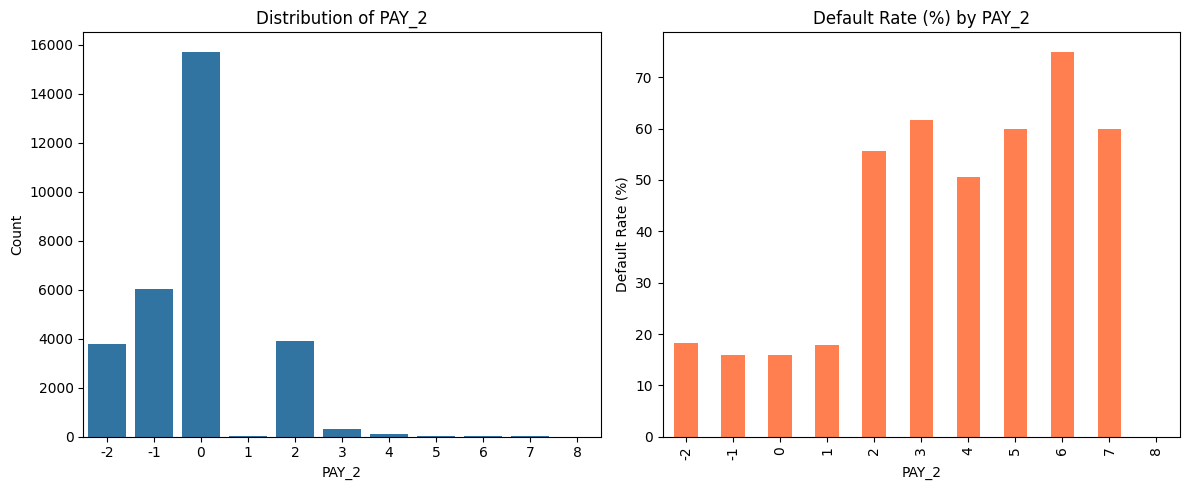

Categorical Analysis of PAY_3:


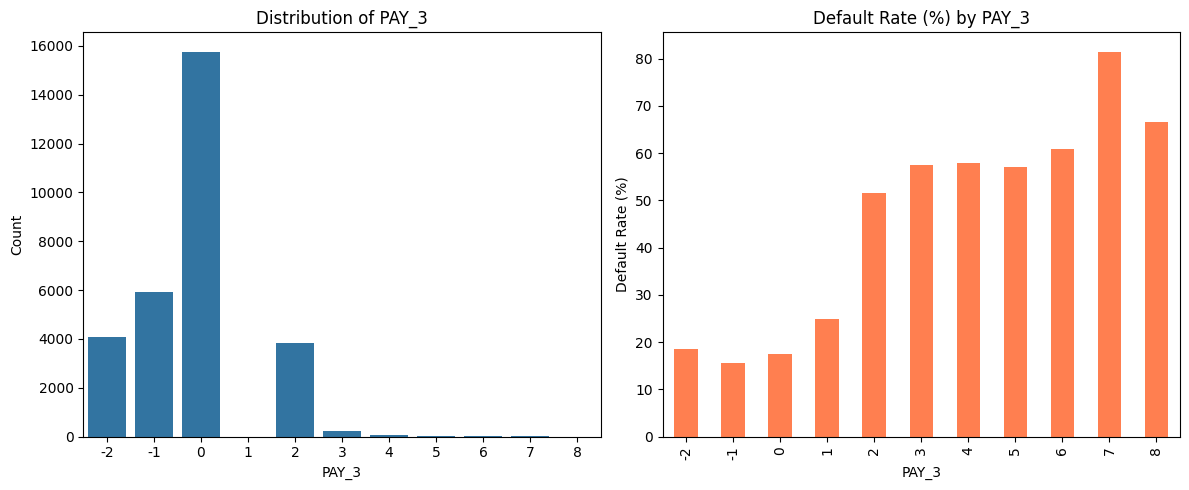

Categorical Analysis of PAY_4:


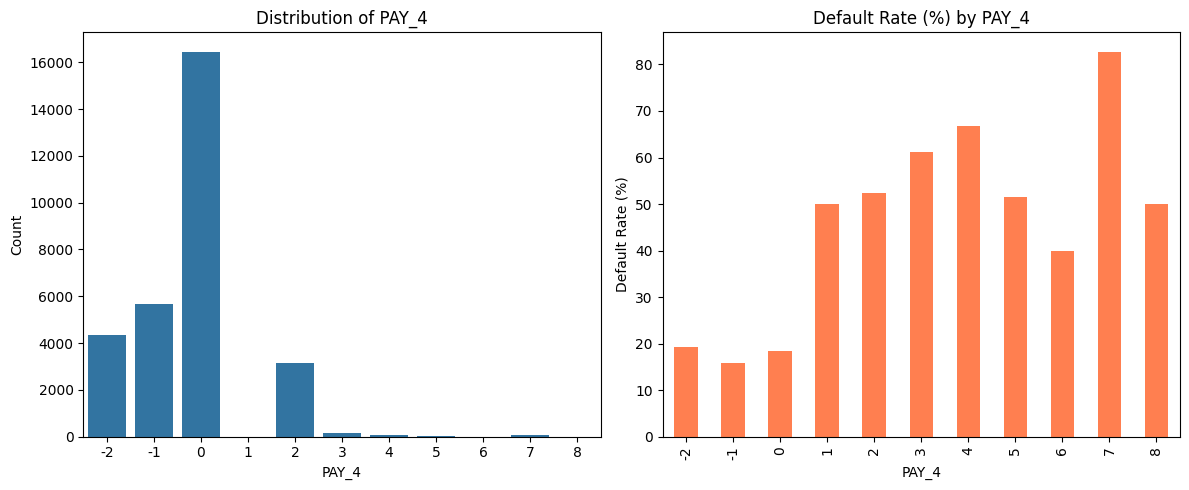

Categorical Analysis of PAY_5:


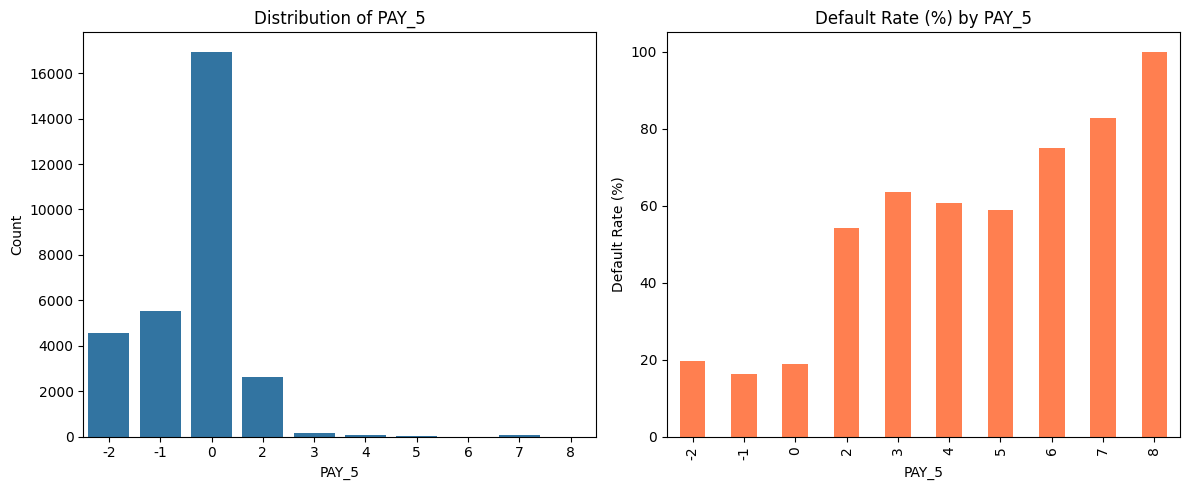

Categorical Analysis of PAY_6:


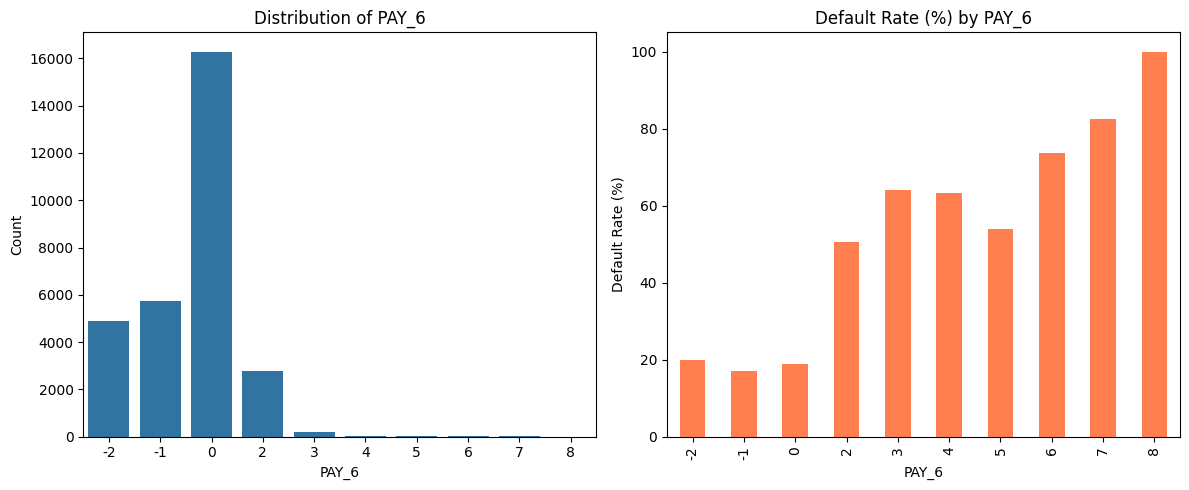


Correlations with default payment:
default      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default, dtype: float64
Correlation Matrix:


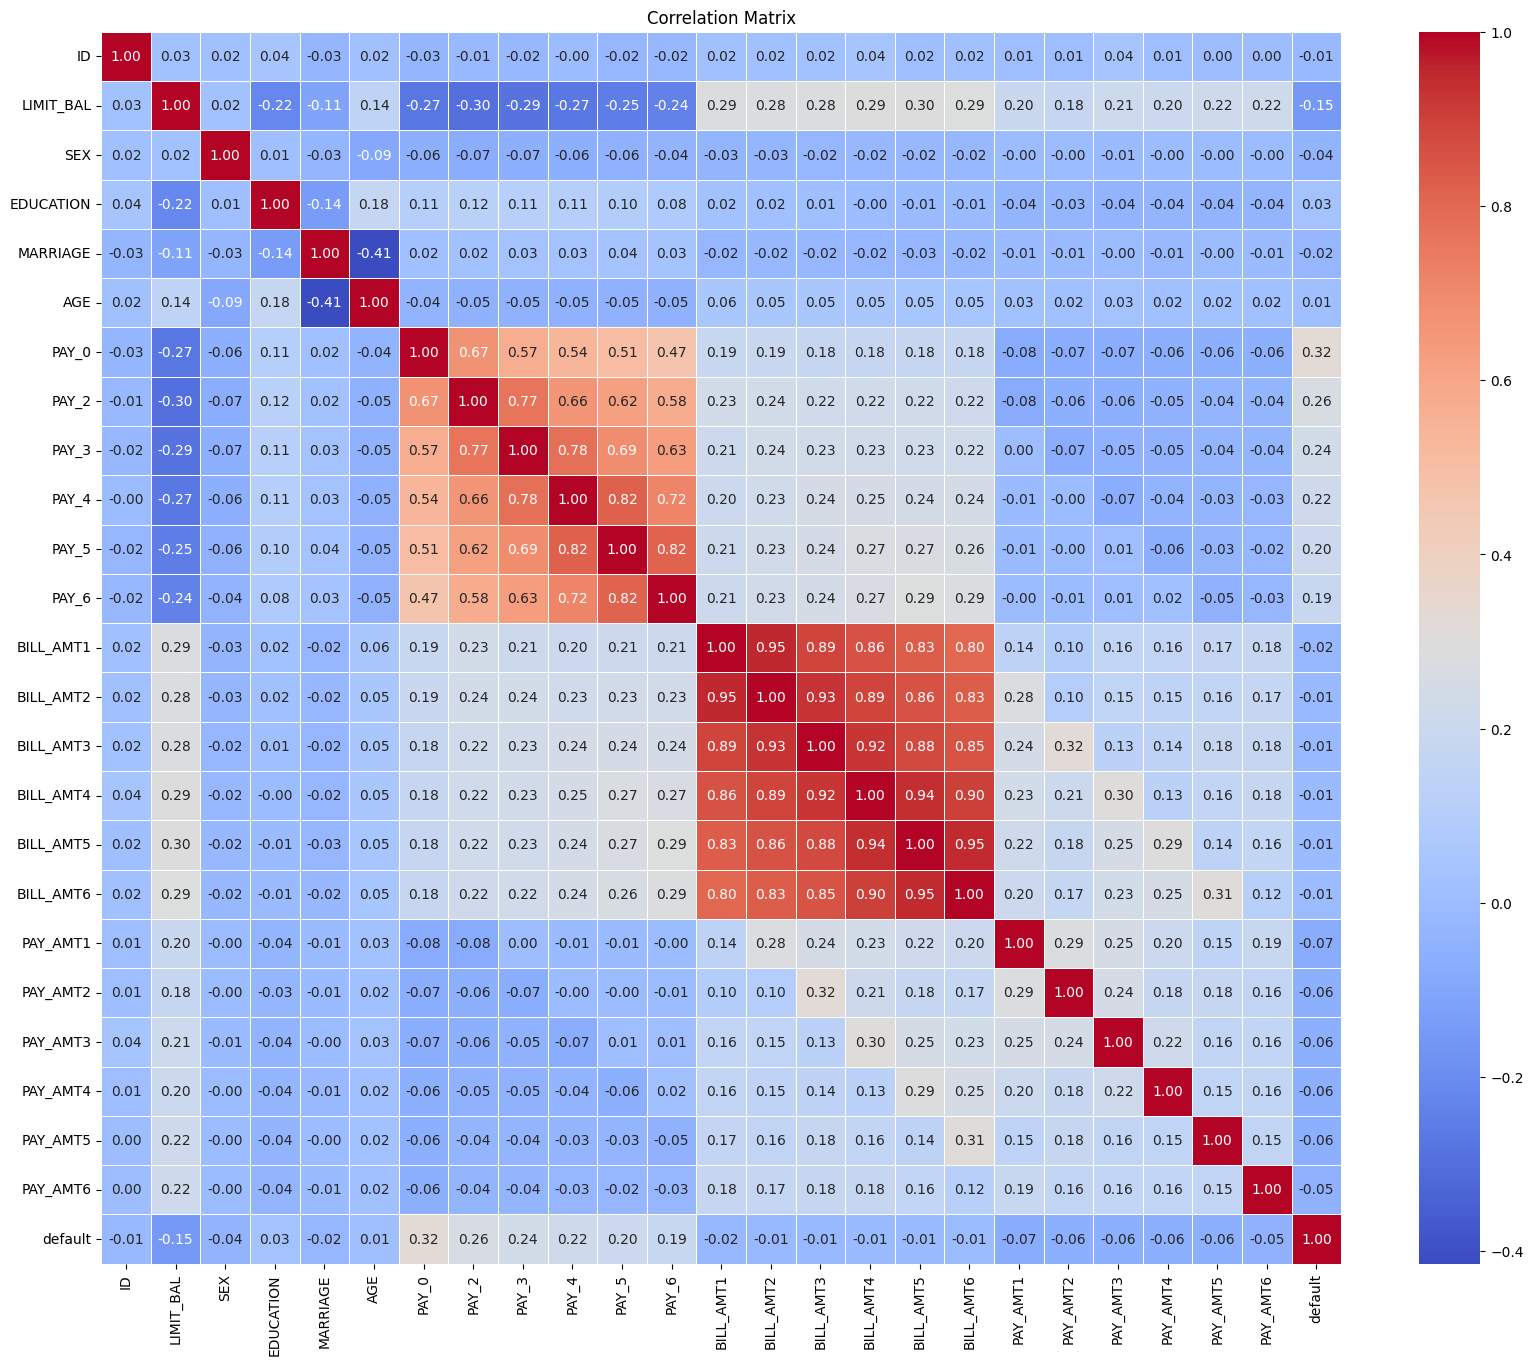

Feature Importance:


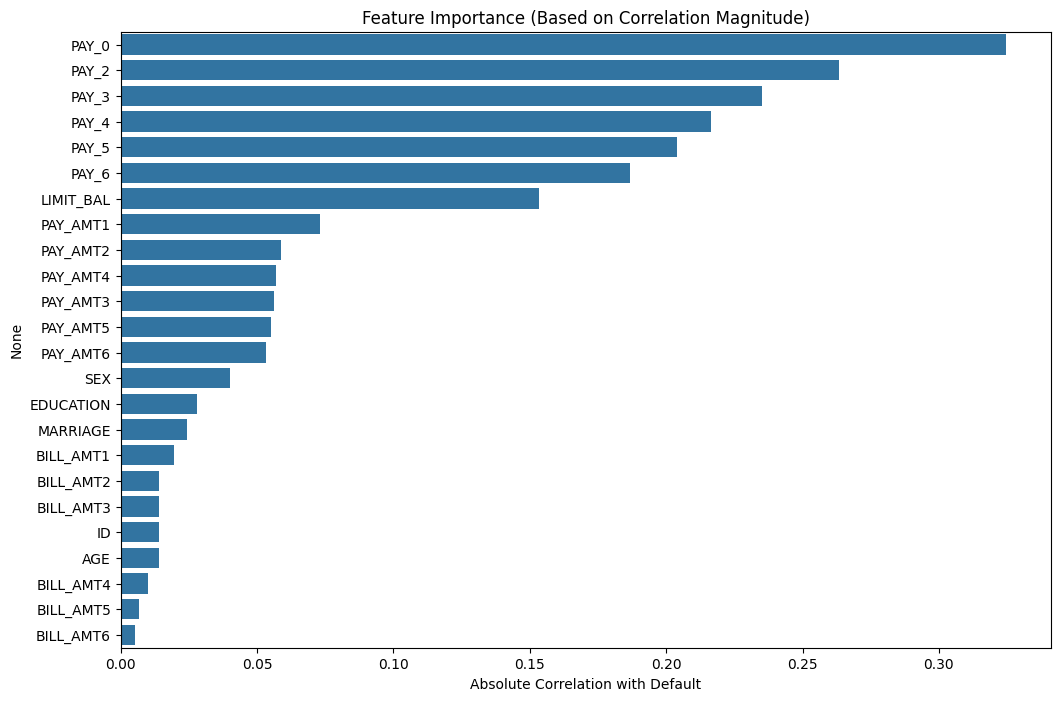

Time Series Patterns:


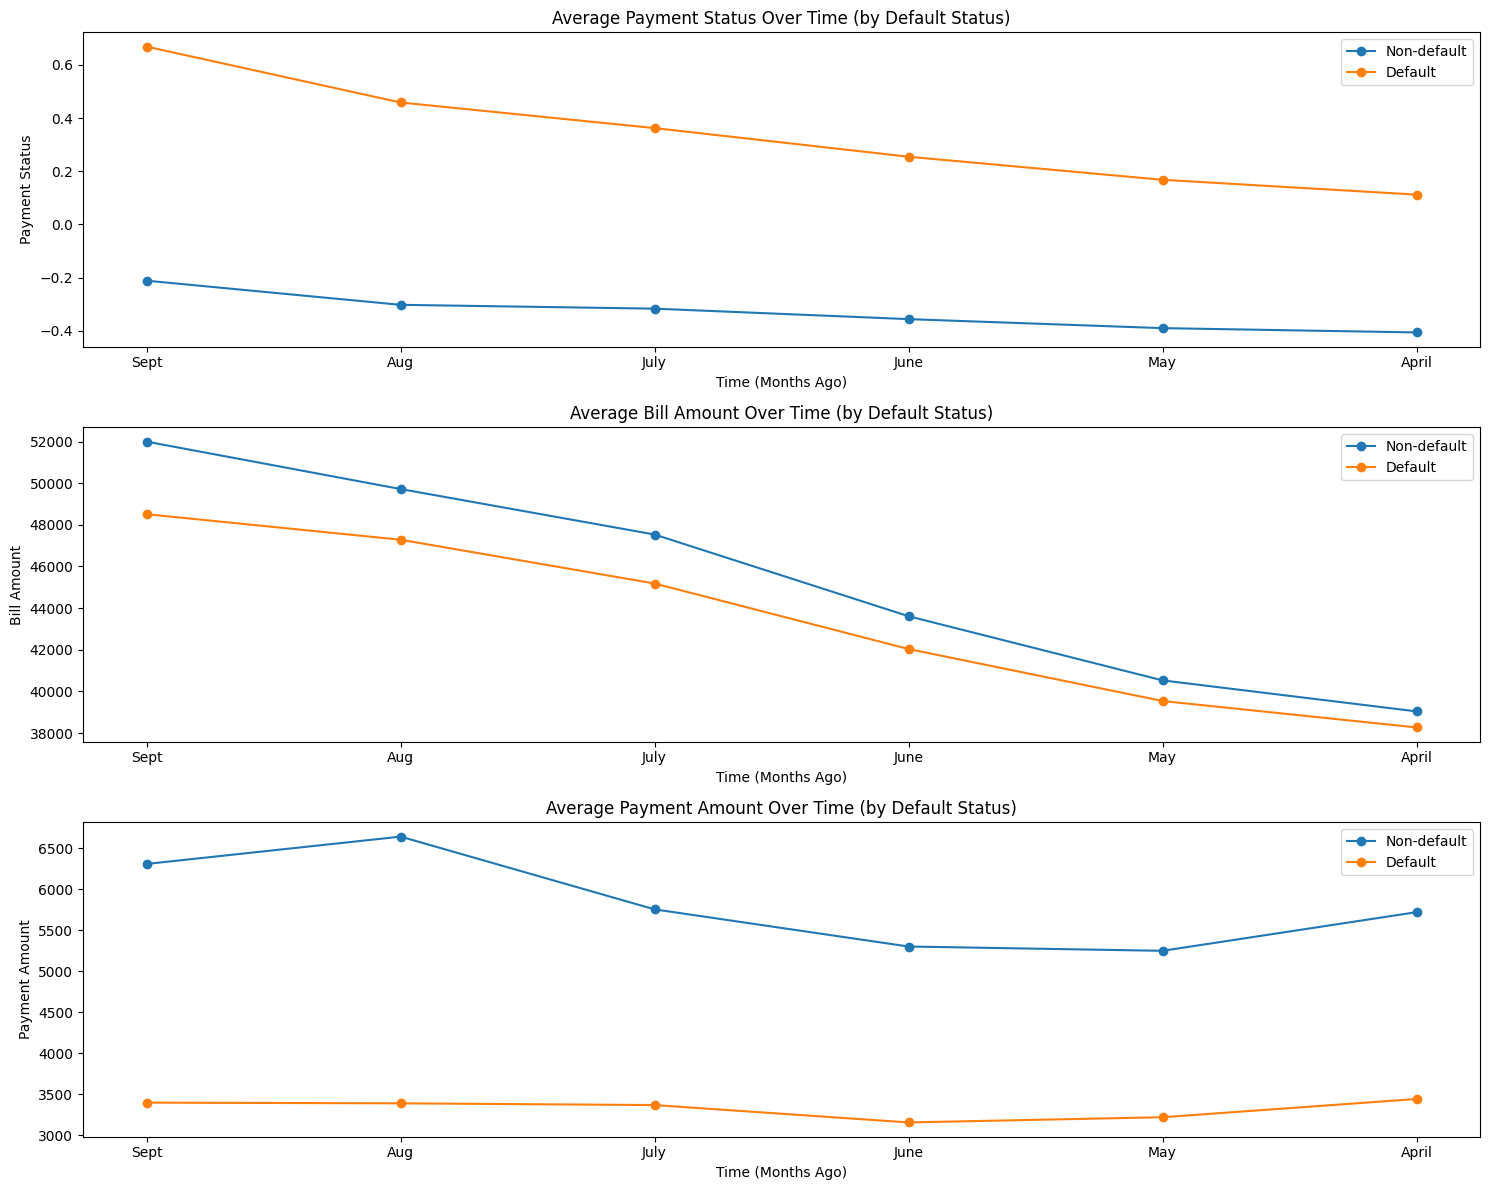

Payment Ratios Over Time:


<Figure size 1200x600 with 0 Axes>

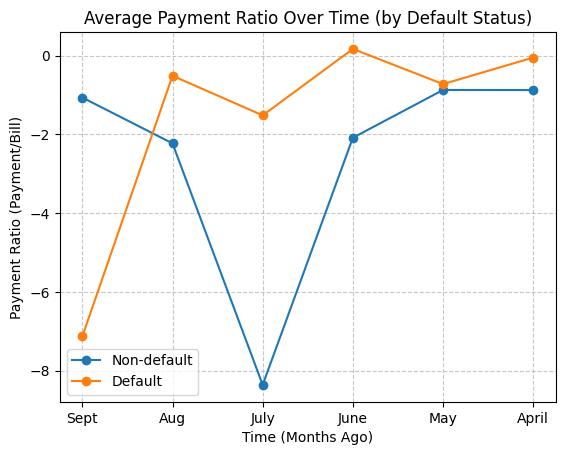


=== Generating Synthetic Dataset ===
Generating synthetic data...
Synthetic data generation complete!
Generated synthetic dataset with 5000 records
Default rate: 22.00%

Sample of synthetic data:
   ID  default  LIMIT_BAL  AGE  SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  \
0   1      0.0   227000.0   40    1          3         1      0     -1      0   
1   2      0.0   191000.0   31    2          2         2     -1      0      0   
2   3      1.0    31000.0   30    2          3         1     -2      0     -1   
3   4      0.0   156000.0   39    1          2         2      0     -1      2   
4   5      0.0   358000.0   40    2          2         1      0      0      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...          0          0          0          0         0         0   
1  ...       5638      19988       3202      25406         0         0   
2  ...      39295      43043      16427       9355         0         0   
3  ...     113135   

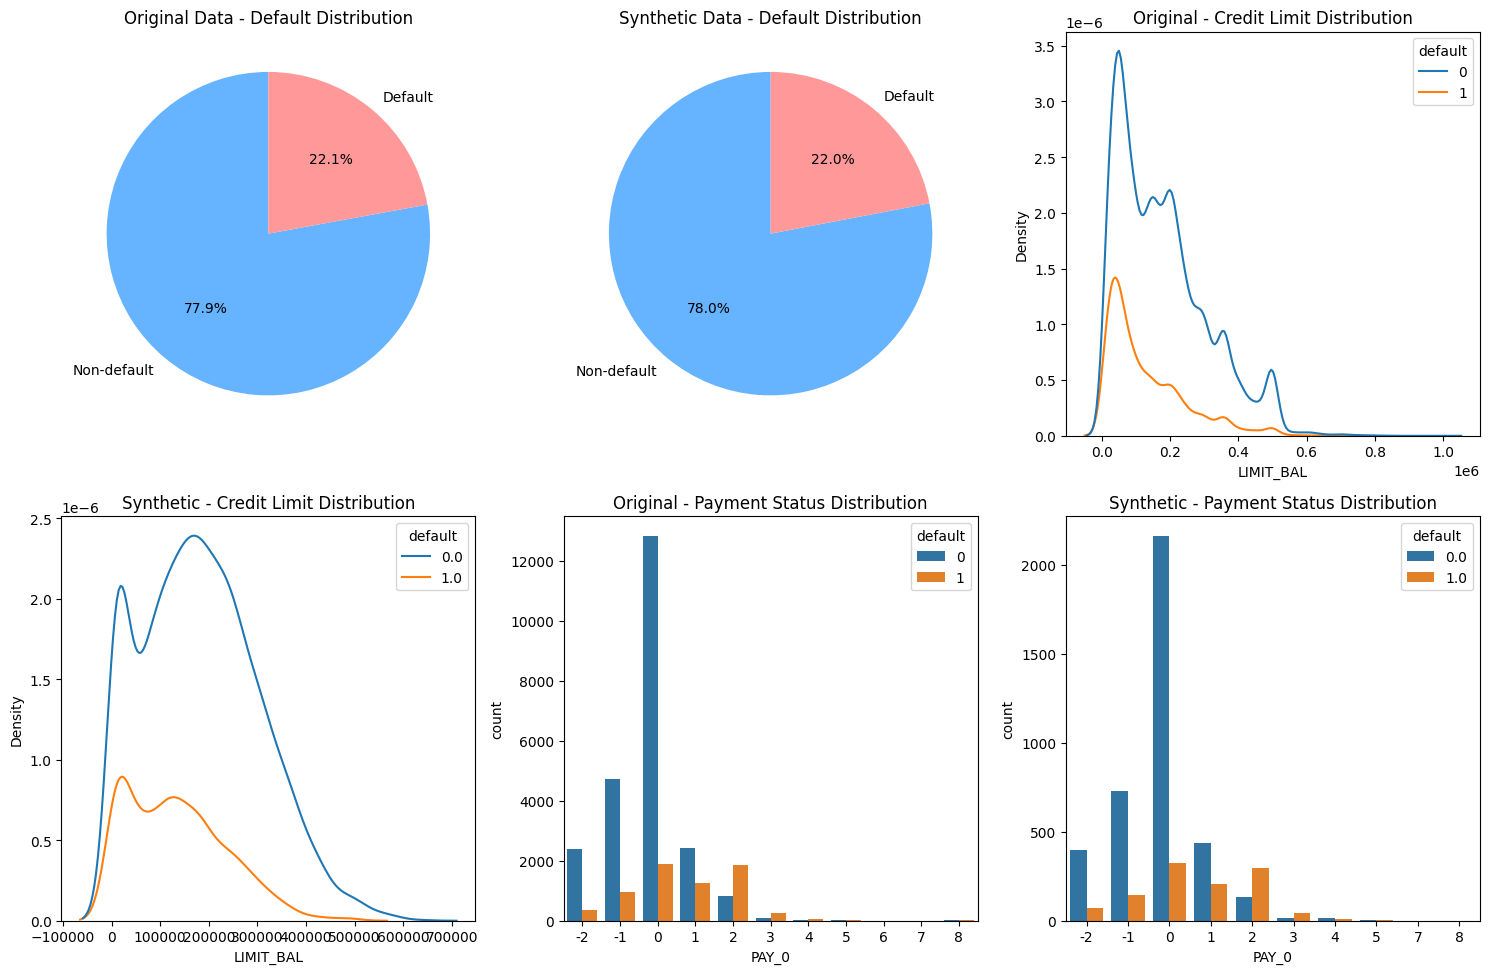

Time Series Comparison:


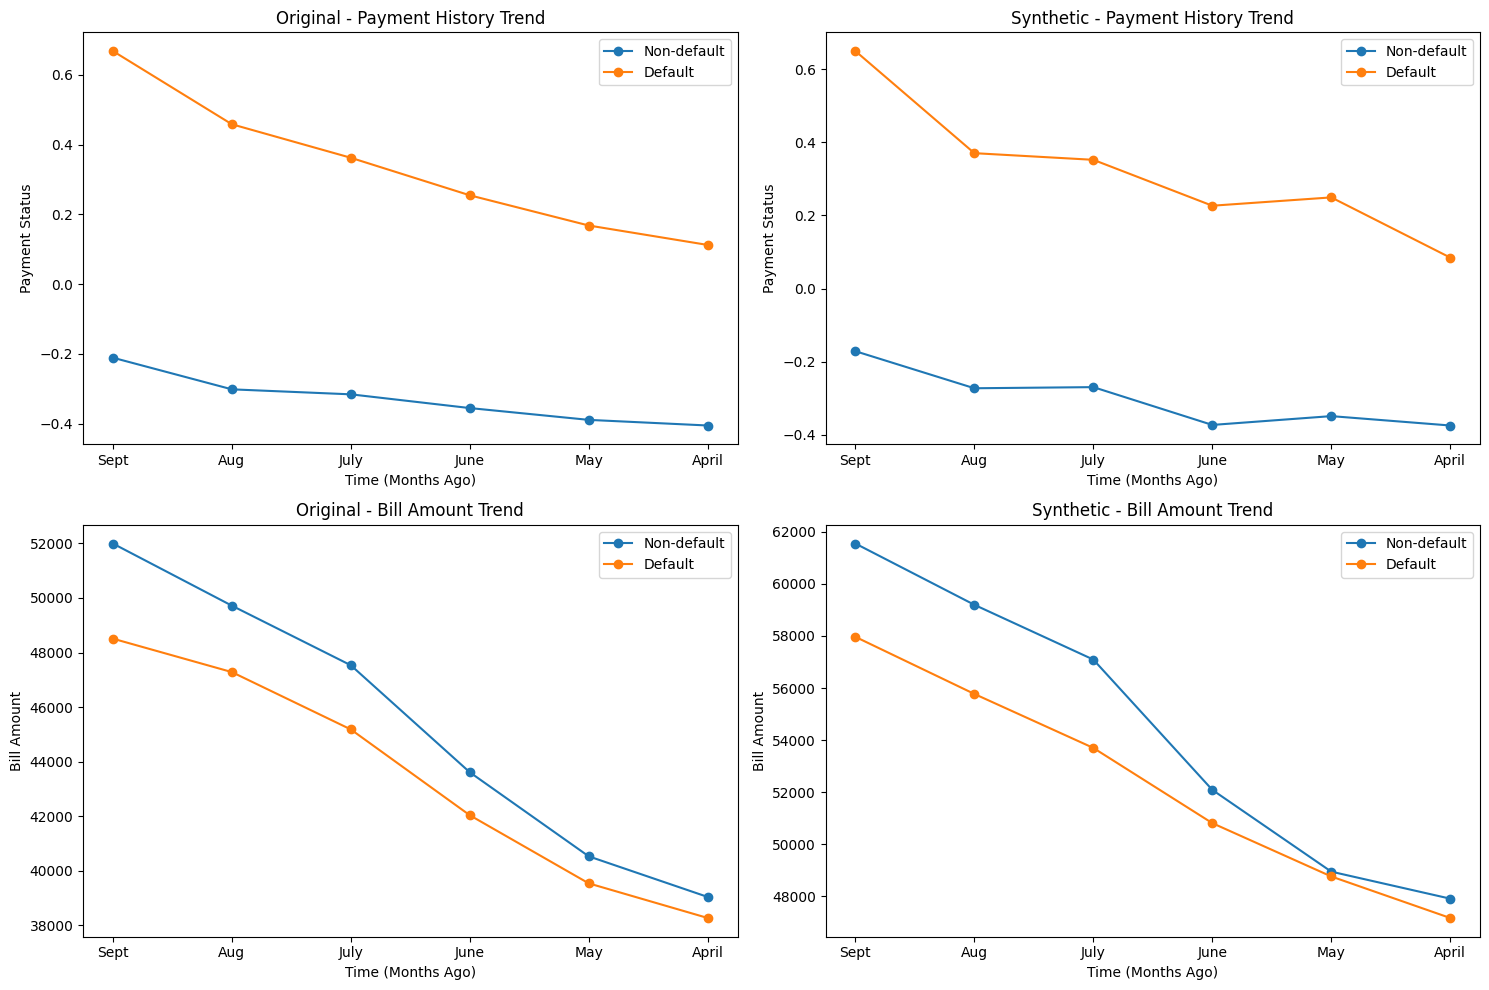

All analysis and synthetic data generation complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os

# Create img directory if it doesn't exist
os.makedirs('./img', exist_ok=True)

# Remove existing PNGs from the root directory (optional)
for file in os.listdir('./'):
    if file.endswith('.png'):
        os.remove(file)
        print(f"Removed {file} from root directory")

# Load the data
df = pd.read_csv('./data/UCI_Credit_Card.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Rename the target variable for easier use
df = df.rename(columns={"default.payment.next.month": "default"})

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Distribution of target variable
plt.figure(figsize=(8, 6))
default_counts = df['default'].value_counts()
plt.pie(default_counts, labels=['Non-default', 'Default'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Default vs Non-default Distribution')
plt.savefig('./img/default_distribution.png')
print("Default Distribution:")
plt.show()  # Display inline

# Feature distributions by default status
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create subplots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='default', bins=30, kde=True, element="step")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.savefig('./img/numerical_distributions.png')
print("Numerical Feature Distributions:")
plt.show()

# Categorical features analysis
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# For each categorical feature, show distribution and default rate
for feature in categorical_features:
    plt.figure(figsize=(12, 5))
    
    # Left subplot: Count distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Right subplot: Default rate by category
    plt.subplot(1, 2, 2)
    default_rate = df.groupby(feature)['default'].mean() * 100
    default_rate.plot(kind='bar', color='coral')
    plt.title(f'Default Rate (%) by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Default Rate (%)')
    
    plt.tight_layout()
    plt.savefig(f'./img/categorical_{feature}.png')
    print(f"Categorical Analysis of {feature}:")
    plt.show()

# Calculate correlations with target
correlations = df.corr()['default'].sort_values(ascending=False)
print("\nCorrelations with default payment:")
print(correlations)

# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('./img/correlation_matrix.png')
print("Correlation Matrix:")
plt.show()

# Feature importance based on correlation magnitude
plt.figure(figsize=(12, 8))
correlations_abs = correlations.drop('default').abs().sort_values(ascending=False)
sns.barplot(x=correlations_abs.values, y=correlations_abs.index)
plt.title('Feature Importance (Based on Correlation Magnitude)')
plt.xlabel('Absolute Correlation with Default')
plt.savefig('./img/feature_importance.png')
print("Feature Importance:")
plt.show()

# Time-series patterns for payment history variables
payment_history = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amounts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payment_amounts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Group by default status to see average patterns over time
plt.figure(figsize=(15, 12))

# Payment history over time
plt.subplot(3, 1, 1)
payment_history_avg = df.groupby('default')[payment_history].mean().T
payment_history_avg.plot(marker='o', ax=plt.gca())
plt.title('Average Payment Status Over Time (by Default Status)')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(payment_history)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Payment Status')
plt.legend(['Non-default', 'Default'])

# Bill amounts over time
plt.subplot(3, 1, 2)
bill_amounts_avg = df.groupby('default')[bill_amounts].mean().T
bill_amounts_avg.plot(marker='o', ax=plt.gca())
plt.title('Average Bill Amount Over Time (by Default Status)')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(bill_amounts)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Bill Amount')
plt.legend(['Non-default', 'Default'])

# Payment amounts over time
plt.subplot(3, 1, 3)
payment_amounts_avg = df.groupby('default')[payment_amounts].mean().T
payment_amounts_avg.plot(marker='o', ax=plt.gca())
plt.title('Average Payment Amount Over Time (by Default Status)')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(payment_amounts)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Payment Amount')
plt.legend(['Non-default', 'Default'])

plt.tight_layout()
plt.savefig('./img/time_series_patterns.png')
print("Time Series Patterns:")
plt.show()

# Payment ratio (payment amount / bill amount) over time
payment_ratios = []
for i in range(1, 7):
    ratio_col = f'PAYMENT_RATIO_{i}'
    df[ratio_col] = df[f'PAY_AMT{i}'] / df[f'BILL_AMT{i}'].replace(0, np.nan)
    payment_ratios.append(ratio_col)

plt.figure(figsize=(12, 6))
payment_ratios_avg = df.groupby('default')[payment_ratios].mean().T
payment_ratios_avg.plot(marker='o')
plt.title('Average Payment Ratio Over Time (by Default Status)')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(payment_ratios)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Payment Ratio (Payment/Bill)')
plt.legend(['Non-default', 'Default'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./img/payment_ratios.png')
print("Payment Ratios Over Time:")
plt.show()

# Now add the synthetic data generator
def generate_synthetic_credit_data(n_samples=10000, default_rate=0.22):
    """
    Generate synthetic credit card data based on distributions from the UCI dataset.
    
    Parameters:
    n_samples (int): Number of samples to generate
    default_rate (float): Proportion of defaults in the dataset
    
    Returns:
    pd.DataFrame: Synthetic credit card dataset
    """
    print("Generating synthetic data...")
    # Determine how many defaulters vs non-defaulters to create
    n_defaulters = int(n_samples * default_rate)
    n_non_defaulters = n_samples - n_defaulters
    
    # Create empty dataframe
    synthetic_data = pd.DataFrame()
    
    # Generate client IDs
    synthetic_data['ID'] = np.arange(1, n_samples + 1)
    
    # Generate default status
    synthetic_data['default'] = np.concatenate([
        np.ones(n_defaulters),
        np.zeros(n_non_defaulters)
    ])
    np.random.shuffle(synthetic_data['default'].values)
    
    # Calculate statistics from original data for defaulters and non-defaulters
    stats_by_default = {
        'default': df[df['default'] == 1],
        'non_default': df[df['default'] == 0]
    }
    
    # Generate LIMIT_BAL based on original distribution by default status
    synthetic_data['LIMIT_BAL'] = synthetic_data['default'].apply(
        lambda x: np.random.normal(
            loc=stats_by_default['default' if x == 1 else 'non_default']['LIMIT_BAL'].mean(),
            scale=stats_by_default['default' if x == 1 else 'non_default']['LIMIT_BAL'].std()
        )
    ).round(-3).clip(10000, 1000000)  # Round to thousands and clip to realistic values
    
    # Generate AGE based on original distribution by default status
    synthetic_data['AGE'] = synthetic_data['default'].apply(
        lambda x: np.random.normal(
            loc=stats_by_default['default' if x == 1 else 'non_default']['AGE'].mean(),
            scale=stats_by_default['default' if x == 1 else 'non_default']['AGE'].std()
        )
    ).round().clip(20, 80).astype(int)  # Round to whole years and clip to realistic ages
    
    # Generate SEX (1=male, 2=female)
    # Calculate proportions from original data
    male_default_rate = df[(df['SEX'] == 1) & (df['default'] == 1)].shape[0] / df[df['SEX'] == 1].shape[0]
    female_default_rate = df[(df['SEX'] == 2) & (df['default'] == 1)].shape[0] / df[df['SEX'] == 2].shape[0]
    
    # Assign gender with appropriate default rates
    genders = []
    for is_default in synthetic_data['default']:
        if is_default == 1:
            # For defaulters, assign gender according to original default rates
            if np.random.random() < (male_default_rate / (male_default_rate + female_default_rate)):
                genders.append(1)  # Male
            else:
                genders.append(2)  # Female
        else:
            # For non-defaulters, maintain similar gender distribution as original
            if np.random.random() < df[df['default'] == 0]['SEX'].value_counts(normalize=True)[1]:
                genders.append(1)  # Male
            else:
                genders.append(2)  # Female
    
    synthetic_data['SEX'] = genders
    
    # Generate EDUCATION (1=graduate school, 2=university, 3=high school, 4=others)
    education_default_rates = df.groupby('EDUCATION')['default'].mean()
    education_overall_dist = df['EDUCATION'].value_counts(normalize=True)
    
    def assign_education(is_default):
        if is_default == 1:
            # Weight by default rates
            weights = education_default_rates * education_overall_dist
            weights = weights / weights.sum()
        else:
            # Weight by non-default rates
            weights = (1 - education_default_rates) * education_overall_dist
            weights = weights / weights.sum()
        
        return np.random.choice(education_default_rates.index, p=weights)
    
    synthetic_data['EDUCATION'] = synthetic_data['default'].apply(assign_education)
    
    # Generate MARRIAGE similarly to EDUCATION
    marriage_default_rates = df.groupby('MARRIAGE')['default'].mean()
    marriage_overall_dist = df['MARRIAGE'].value_counts(normalize=True)
    
    def assign_marriage(is_default):
        if is_default == 1:
            weights = marriage_default_rates * marriage_overall_dist
            weights = weights / weights.sum()
        else:
            weights = (1 - marriage_default_rates) * marriage_overall_dist
            weights = weights / weights.sum()
        
        return np.random.choice(marriage_default_rates.index, p=weights)
    
    synthetic_data['MARRIAGE'] = synthetic_data['default'].apply(assign_marriage)
    
    # Generate payment history (PAY_0 through PAY_6)
    # For defaulters, payment delays should increase closer to default
    # For non-defaulters, payment should be mostly on time
    
    pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    
    for i, col in enumerate(pay_columns):
        # Get distributions for defaulters and non-defaulters
        defaulter_dist = stats_by_default['default'][col].value_counts(normalize=True)
        non_defaulter_dist = stats_by_default['non_default'][col].value_counts(normalize=True)
        
        # Fill missing values in distributions
        all_values = set(defaulter_dist.index) | set(non_defaulter_dist.index)
        for val in all_values:
            if val not in defaulter_dist:
                defaulter_dist[val] = 0.001  # Small probability
            if val not in non_defaulter_dist:
                non_defaulter_dist[val] = 0.001  # Small probability
        
        # Normalize again after filling
        defaulter_dist = defaulter_dist / defaulter_dist.sum()
        non_defaulter_dist = non_defaulter_dist / non_defaulter_dist.sum()
        
        # Generate values
        defaulter_values = np.random.choice(
            defaulter_dist.index, 
            size=n_defaulters, 
            p=defaulter_dist.values
        )
        
        non_defaulter_values = np.random.choice(
            non_defaulter_dist.index, 
            size=n_non_defaulters, 
            p=non_defaulter_dist.values
        )
        
        # Combine and assign based on default status
        synthetic_data[col] = synthetic_data['default'].apply(
            lambda x: np.random.choice(defaulter_values) if x == 1 else np.random.choice(non_defaulter_values)
        )
    
    # Generate bill amounts (BILL_AMT1 through BILL_AMT6)
    bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    
    # First, we need to capture the correlation structure in bill amounts over time
    # Calculate correlation matrices for defaulters and non-defaulters
    bill_corr_defaulters = stats_by_default['default'][bill_columns].corr().values
    bill_corr_non_defaulters = stats_by_default['non_default'][bill_columns].corr().values
    
    # Generate base distributions
    for default_status, n_records, corr_matrix in [
        (1, n_defaulters, bill_corr_defaulters),
        (0, n_non_defaulters, bill_corr_non_defaulters)
    ]:
        # Get means and standard deviations
        group = 'default' if default_status == 1 else 'non_default'
        means = stats_by_default[group][bill_columns].mean().values
        stds = stats_by_default[group][bill_columns].std().values
        
        # Generate correlated random variables
        rng = np.random.default_rng()
        # Generate uncorrelated samples
        uncorrelated = rng.standard_normal(size=(n_records, len(bill_columns)))
        # Compute Cholesky decomposition
        L = np.linalg.cholesky(corr_matrix)
        # Apply correlation
        correlated = uncorrelated @ L.T
        # Scale and shift to match desired means and standard deviations
        for j in range(len(bill_columns)):
            correlated[:, j] = correlated[:, j] * stds[j] + means[j]
        
        # Assign to respective rows
        for j, col in enumerate(bill_columns):
            mask = synthetic_data['default'] == default_status
            synthetic_data.loc[mask, col] = correlated[:, j]
    
    # Ensure bill amounts are non-negative
    for col in bill_columns:
        synthetic_data[col] = synthetic_data[col].clip(0)
    
    # Generate payment amounts (PAY_AMT1 through PAY_AMT6)
    # These should be related to bill amounts
    pay_amt_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    
    # Calculate average payment ratio for defaulters and non-defaulters
    defaulter_pay_ratios = []
    non_defaulter_pay_ratios = []
    
    for i in range(len(pay_amt_columns)):
        bill_col = bill_columns[i]
        pay_col = pay_amt_columns[i]
        
        defaulter_ratio = (stats_by_default['default'][pay_col] / stats_by_default['default'][bill_col].replace(0, np.nan)).mean()
        non_defaulter_ratio = (stats_by_default['non_default'][pay_col] / stats_by_default['non_default'][bill_col].replace(0, np.nan)).mean()
        
        defaulter_pay_ratios.append(defaulter_ratio)
        non_defaulter_pay_ratios.append(non_defaulter_ratio)
    
    # Generate payment amounts based on bill amounts and payment ratios
    for i, (pay_col, bill_col) in enumerate(zip(pay_amt_columns, bill_columns)):
        # For defaulters
        defaulter_mask = synthetic_data['default'] == 1
        bill_amounts = synthetic_data.loc[defaulter_mask, bill_col].values
        ratio_mean = defaulter_pay_ratios[i]
        ratio_std = 0.15  # Standard deviation of payment ratio
        
        # Generate payment ratios with normal distribution, clipped to be non-negative
        ratios = np.random.normal(ratio_mean, ratio_std, size=len(bill_amounts))
        ratios = np.clip(ratios, 0, 1)
        
        synthetic_data.loc[defaulter_mask, pay_col] = bill_amounts * ratios
        
        # For non-defaulters
        non_defaulter_mask = synthetic_data['default'] == 0
        bill_amounts = synthetic_data.loc[non_defaulter_mask, bill_col].values
        ratio_mean = non_defaulter_pay_ratios[i]
        ratio_std = 0.2  # Standard deviation of payment ratio
        
        # Generate payment ratios with normal distribution, clipped to realistic values
        ratios = np.random.normal(ratio_mean, ratio_std, size=len(bill_amounts))
        ratios = np.clip(ratios, 0, 2)  # Allow overpayment for non-defaulters
        
        synthetic_data.loc[non_defaulter_mask, pay_col] = bill_amounts * ratios
    
    # Round payment amounts to integers
    for col in pay_amt_columns:
        synthetic_data[col] = synthetic_data[col].round().astype(int)
    
    # Round bill amounts to integers
    for col in bill_columns:
        synthetic_data[col] = synthetic_data[col].round().astype(int)
    
    print("Synthetic data generation complete!")
    return synthetic_data

# Generate synthetic data
print("\n=== Generating Synthetic Dataset ===")
synthetic_df = generate_synthetic_credit_data(n_samples=5000)

# Save the synthetic data
synthetic_df.to_csv('./synthetic_credit_data.csv', index=False)

print(f"Generated synthetic dataset with {len(synthetic_df)} records")
print(f"Default rate: {synthetic_df['default'].mean():.2%}")

# Show the first few rows of the synthetic data
print("\nSample of synthetic data:")
print(synthetic_df.head())

# Plot distributions to compare original vs synthetic data
plt.figure(figsize=(15, 10))

# Compare default distributions
plt.subplot(2, 3, 1)
plt.pie([1-df['default'].mean(), df['default'].mean()], 
        labels=['Non-default', 'Default'], 
        autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'],
        startangle=90)
plt.title('Original Data - Default Distribution')

plt.subplot(2, 3, 2)
plt.pie([1-synthetic_df['default'].mean(), synthetic_df['default'].mean()], 
        labels=['Non-default', 'Default'], 
        autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'],
        startangle=90)
plt.title('Synthetic Data - Default Distribution')

# Compare credit limit distributions
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='LIMIT_BAL', hue='default')
plt.title('Original - Credit Limit Distribution')

plt.subplot(2, 3, 4)
sns.kdeplot(data=synthetic_df, x='LIMIT_BAL', hue='default')
plt.title('Synthetic - Credit Limit Distribution')

# Compare payment status distributions
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='PAY_0', hue='default')
plt.title('Original - Payment Status Distribution')

plt.subplot(2, 3, 6)
sns.countplot(data=synthetic_df, x='PAY_0', hue='default')
plt.title('Synthetic - Payment Status Distribution')

plt.tight_layout()
plt.savefig('./img/original_vs_synthetic_comparison.png')
print("Comparison of Original vs Synthetic Data:")
plt.show()

# Create additional validation plots for your presentation
# Time series comparison
plt.figure(figsize=(15, 10))

# Compare payment history trends
plt.subplot(2, 2, 1)
original_payment_history = df.groupby('default')[payment_history].mean().T
original_payment_history.plot(marker='o', ax=plt.gca())
plt.title('Original - Payment History Trend')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(payment_history)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Payment Status')
plt.legend(['Non-default', 'Default'])

plt.subplot(2, 2, 2)
synthetic_payment_history = synthetic_df.groupby('default')[payment_history].mean().T
synthetic_payment_history.plot(marker='o', ax=plt.gca())
plt.title('Synthetic - Payment History Trend')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(payment_history)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Payment Status')
plt.legend(['Non-default', 'Default'])

# Compare bill amount trends
plt.subplot(2, 2, 3)
original_bill_amounts = df.groupby('default')[bill_amounts].mean().T
original_bill_amounts.plot(marker='o', ax=plt.gca())
plt.title('Original - Bill Amount Trend')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(bill_amounts)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Bill Amount')
plt.legend(['Non-default', 'Default'])

plt.subplot(2, 2, 4)
synthetic_bill_amounts = synthetic_df.groupby('default')[bill_amounts].mean().T
synthetic_bill_amounts.plot(marker='o', ax=plt.gca())
plt.title('Synthetic - Bill Amount Trend')
plt.xlabel('Time (Months Ago)')
plt.xticks(range(len(bill_amounts)), ['Sept', 'Aug', 'July', 'June', 'May', 'April'])
plt.ylabel('Bill Amount')
plt.legend(['Non-default', 'Default'])

plt.tight_layout()
plt.savefig('./img/time_series_comparison.png')
print("Time Series Comparison:")
plt.show()

print("All analysis and synthetic data generation complete!")